In [1]:
import pandas as pd
import numpy as np
import datetime
from tqdm.notebook import tqdm

### Reading the Data

In [3]:
train_df = pd.read_csv("sign_mnist_train.csv")
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
test_df = pd.read_csv("sign_mnist_test.csv")
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [5]:
categories = train_df["label"].unique()
categories.sort()
categories.shape

(24,)

### Preprocessing the Data

In [6]:
from sklearn.preprocessing import MinMaxScaler
train_df = train_df.sample(frac=1)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(train_df.iloc[:,1:])
y_train = train_df.iloc[:,0]

In [7]:
test_df = test_df.sample(frac=1)
x_test =  scaler.fit_transform(test_df.iloc[:,1:])
y_test = test_df.iloc[:,0]

In [8]:
del train_df
del test_df

### PCA

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

### Training Different Models

In [10]:
from sklearn import svm
TRAIN_LEN = x_train.shape[0]
TEST_LEN = x_test.shape[0]
c = [0.01,0.1,1,10]
kernels = ['linear', 'poly', 'rbf']


for i in tqdm(range(len(c))):
    for j in range(len(kernels)):
        clf = svm.SVC(C = c[i], kernel = kernels[j])
        clf.fit(x_train[:TRAIN_LEN],y_train.iloc[:TRAIN_LEN],)
        pred = clf.predict(x_test[:TEST_LEN])
        print("-------------------")
        print("For the SVM with C = " + str(c[i]) + " and kernel = " + kernels[j])  
        print("Acc. in " + str(TEST_LEN) + " test samples: "  + "%" + str(100 * np.array([pred == y_test.iloc[:TEST_LEN]]).sum()/TEST_LEN))
        print("-------------------")

  0%|          | 0/4 [00:00<?, ?it/s]

-------------------
For the SVM with C = 0.01 and kernel = linear
Acc. in 7172 test samples: %64.89124372559955
-------------------
-------------------
For the SVM with C = 0.01 and kernel = poly
Acc. in 7172 test samples: %25.72504182933631
-------------------
-------------------
For the SVM with C = 0.01 and kernel = rbf
Acc. in 7172 test samples: %36.09871723368656
-------------------
-------------------
For the SVM with C = 0.1 and kernel = linear
Acc. in 7172 test samples: %73.00613496932516
-------------------
-------------------
For the SVM with C = 0.1 and kernel = poly
Acc. in 7172 test samples: %52.94199665365309
-------------------
-------------------
For the SVM with C = 0.1 and kernel = rbf
Acc. in 7172 test samples: %67.63803680981596
-------------------
-------------------
For the SVM with C = 1 and kernel = linear
Acc. in 7172 test samples: %73.20133853876185
-------------------
-------------------
For the SVM with C = 1 and kernel = poly
Acc. in 7172 test samples: %75.

### Testing a Single Sample With Visualization

In [10]:
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import imshow

--------------
The model predicted this instance as label 11
--------------
Where its label is 11


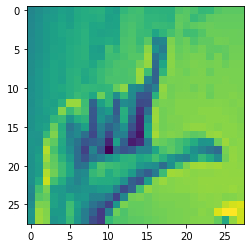

In [11]:
instance = 80 
a = x_test[instance].reshape(1,-1)
a_image = a.reshape((28,28))

pred_a = clf.predict(a)
im = Image.fromarray((a_image.astype(np.uint8)))

imshow(np.asarray(a_image))
print("--------------")
print("The model predicted this instance as label", pred[instance])
print("--------------")
print("Where its label is", y_test.iloc[instance])

In [12]:
categories

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test.to_numpy(), pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      0.99      0.99       432
           2       0.84      0.99      0.91       310
           3       0.87      1.00      0.93       245
           4       0.93      1.00      0.96       498
           5       0.88      0.93      0.91       247
           6       0.94      0.89      0.91       348
           7       0.96      0.95      0.96       436
           8       0.75      0.97      0.85       288
          10       0.85      0.67      0.75       331
          11       0.89      0.95      0.92       209
          12       0.90      0.72      0.80       394
          13       0.74      0.73      0.73       291
          14       0.99      0.91      0.95       246
          15       1.00      1.00      1.00       347
          16       0.95      1.00      0.98       164
          17       0.39      0.72      0.50       144
          18       0.81    